In [1]:
# Diamonds Dataset (Seaborn)
# Описание: Характеристики бриллиантов.
# Задача: Предсказать цену.

In [2]:
import pandas as pd
print(pd.__version__)

2.2.3


In [3]:
import seaborn as sns

In [4]:
# Загрузка данных из CSV
df = sns.load_dataset('diamonds')

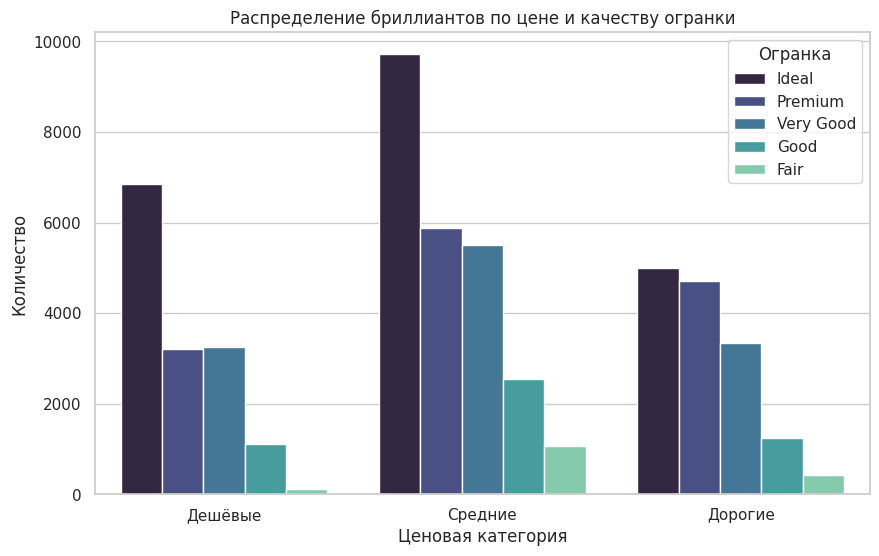

In [5]:
# Распределение бриллиантов по цене и качеству огранки.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Создаём ценовые категории
df['price_category'] = pd.cut(df['price'],
                              bins=[0, 1000, 5000, df['price'].max()],
                              labels=['Дешёвые', 'Средние', 'Дорогие'])

# Визуализация
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='price_category', hue='cut', palette='mako')
plt.title('Распределение бриллиантов по цене и качеству огранки')
plt.xlabel('Ценовая категория')
plt.ylabel('Количество')
plt.legend(title='Огранка')
plt.show()

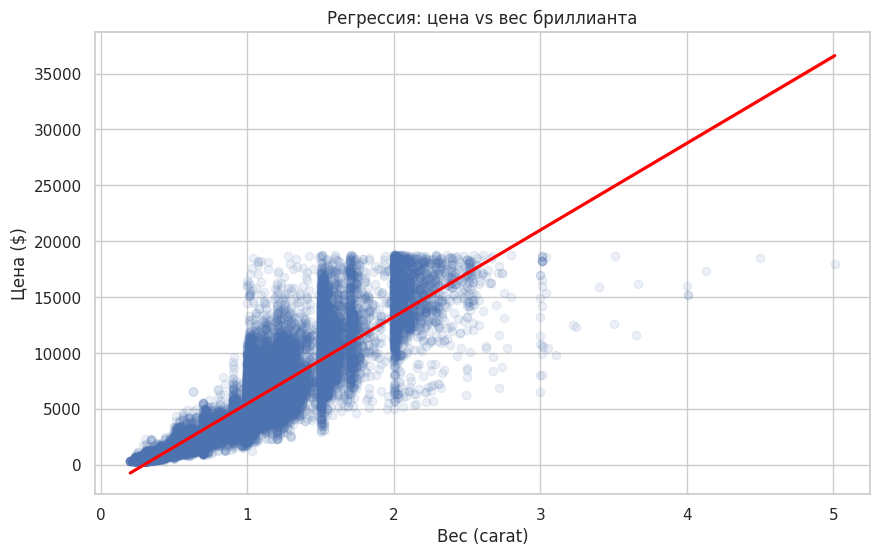

In [6]:
# цена от веса
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация регрессии
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='carat', y='price', scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
plt.title('Регрессия: цена vs вес бриллианта')
plt.xlabel('Вес (carat)')
plt.ylabel('Цена ($)')
plt.show()

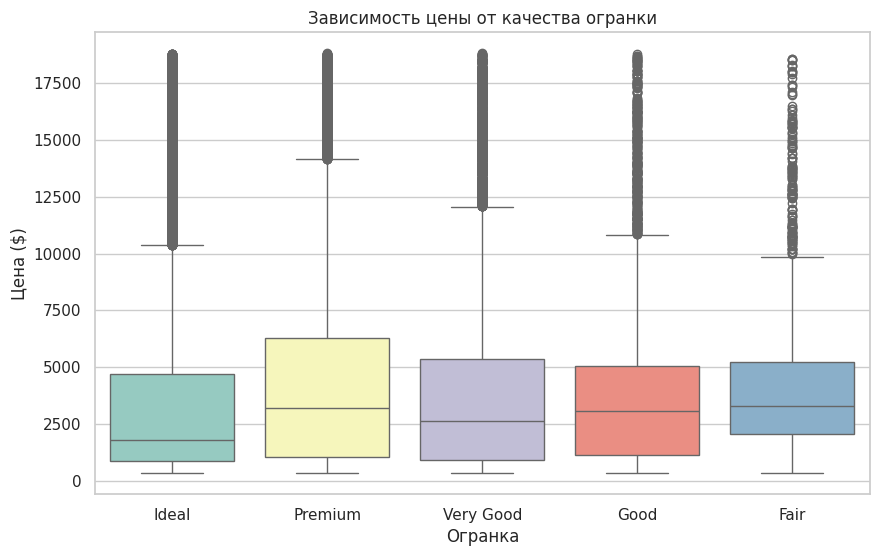

In [7]:
# цена от качества огранки
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cut', y='price', hue='cut', palette='Set3', legend=False)
plt.title('Зависимость цены от качества огранки')
plt.xlabel('Огранка')
plt.ylabel('Цена ($)')
plt.show()

In [8]:
# Загрузка данных из CSV
df = sns.load_dataset('diamonds')

# Просмотр первых 5 строк
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [9]:
# общее количество строк в DataFrame
# через функцию len()
num_rows = len(df)
print(f"Всего строк: {num_rows}")

Всего строк: 53940


In [10]:
# Просмотр структуры данных
df.head()  # первые 5 строк
df.info()  # информация о типах данных и пропусках
df.describe()  # статистика числовых столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
# Проверка на пропущенные значения
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
import seaborn as sns

# Загрузка данных
df = sns.load_dataset('diamonds')
# Преобразование категорий в числовые значения
for col in ['cut', 'color', 'clarity']:
    df[col] = df[col].astype('category').cat.codes


In [13]:
# Разделение на признаки и целевую переменную
X = df.drop('price', axis=1)  # 'price' — целевая переменная
y = df['price']

In [14]:
# Разделение на train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*****************
Метрики качества:
*****************
MAE: 314.7090
MSE: 322506.6765
RMSE: 567.8967
MAPE: 0.0996
R²: 0.9797


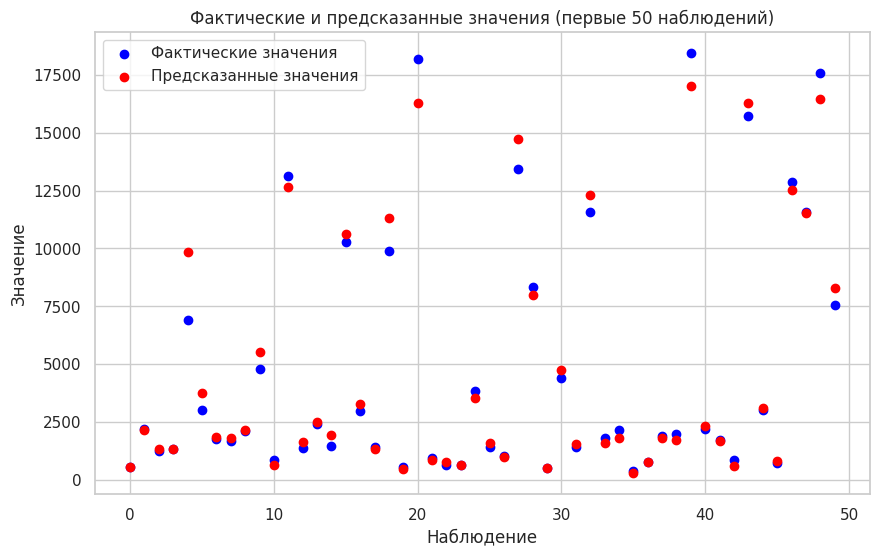

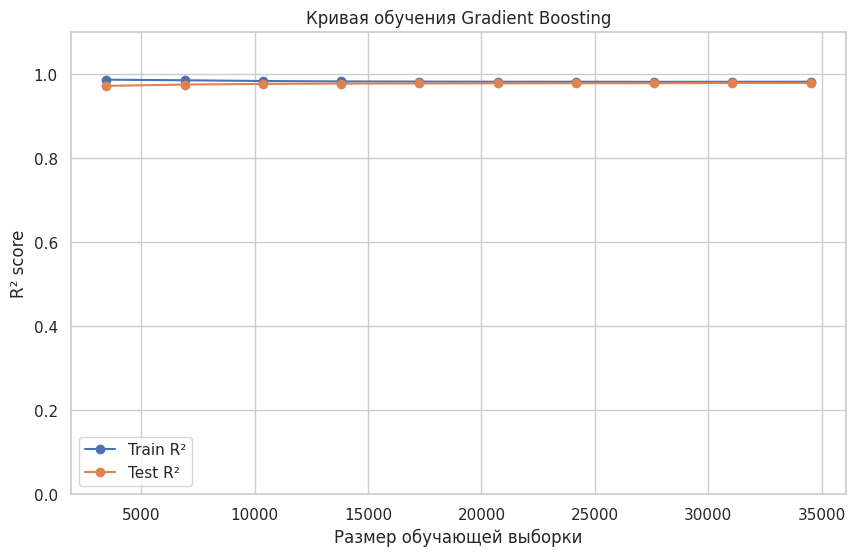

In [15]:
# Регрессор Gradient Boosting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Создание и обучение модели Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    min_samples_leaf=10,
    subsample=0.8,
    random_state=42
) # параметры
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений (первые 50 наблюдений)
plt.figure(figsize=(10, 6))
plt.scatter(range(50), y_test[:50], color='blue', label='Фактические значения')
plt.scatter(range(50), y_pred[:50], color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения (первые 50 наблюдений)')
plt.legend()
plt.show()

# Кривая обучения Gradient Boosting"
train_sizes, train_scores, test_scores = learning_curve(
    model,
    X_train,
    y_train,
    cv=5,
    scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Train R²")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Test R²")
plt.xlabel("Размер обучающей выборки")
plt.ylabel("R² score")
plt.ylim(0, 1.1)
plt.legend()
plt.title("Кривая обучения Gradient Boosting")
plt.grid(True)
plt.show()




*****************
Метрики качества:
*****************
MAE: 1094.2534
MSE: 2659815.8688
RMSE: 1630.8942
MAPE: 0.3894
R²: 0.8327


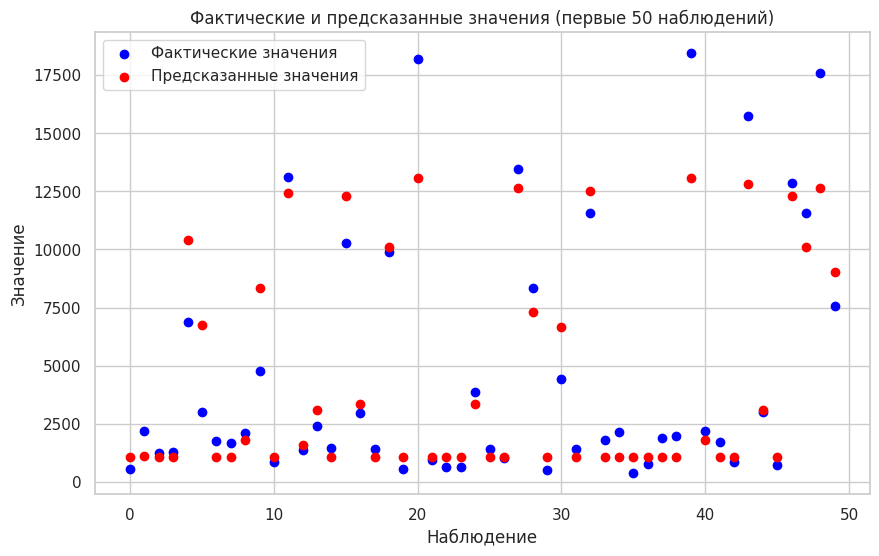

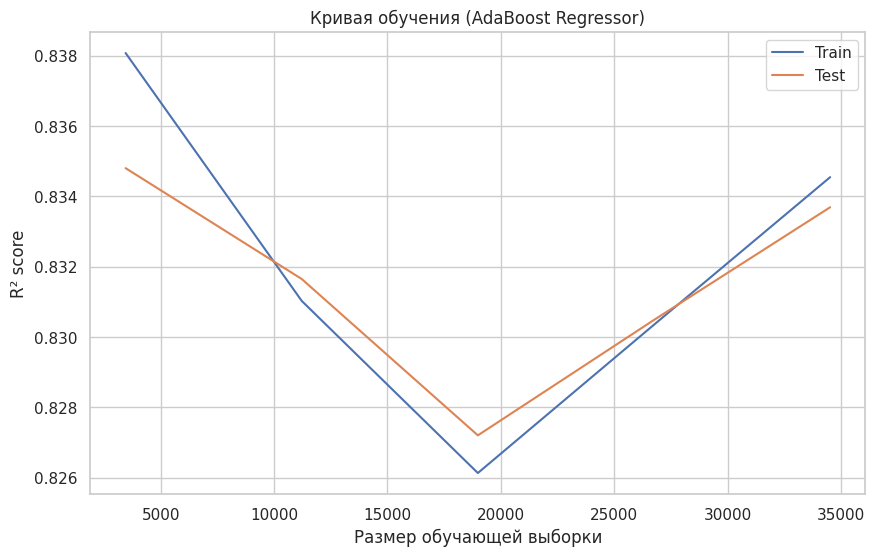

In [16]:
# Модель регрессии AdaBoost (Adaptive Boosting)
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Создание и обучение модели
base_model = DecisionTreeRegressor(max_depth=2)  # слабый learner
ada_model = AdaBoostRegressor(
    estimator=base_model,
    n_estimators=100,  # количество деревьев
    learning_rate=0.1,  # скорость обучения (меньше = более плавное обучение)
    random_state=42
)
ada_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = ada_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)



print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений (первые 50 наблюдений)
plt.figure(figsize=(10, 6))
plt.scatter(range(50), y_test[:50], color='blue', label='Фактические значения')
plt.scatter(range(50), y_pred[:50], color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения (первые 50 наблюдений)')
plt.legend()
plt.show()


# "Кривая обучения (AdaBoost Regressor)"
train_sizes, train_scores, test_scores = learning_curve(
    ada_model, 
    X_train, 
    y_train, 
    cv=5, 
    scoring='r2'
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test")
plt.xlabel("Размер обучающей выборки")
plt.ylabel("R² score")
plt.legend()
plt.title("Кривая обучения (AdaBoost Regressor)")
plt.grid(True)
plt.show()


*****************
Метрики качества:
*****************
MAE: 513.6811
MSE: 784264.8709
RMSE: 885.5873
MAPE: 0.1606
R²: 0.9507


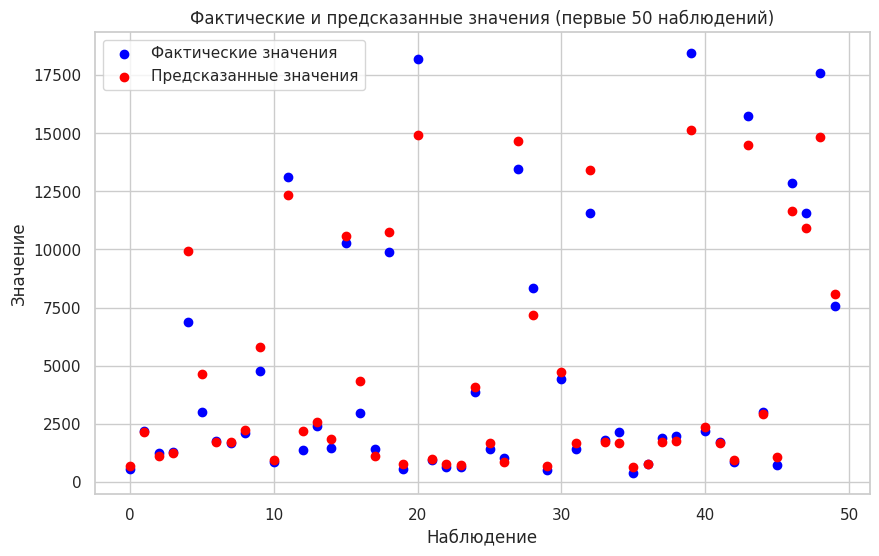

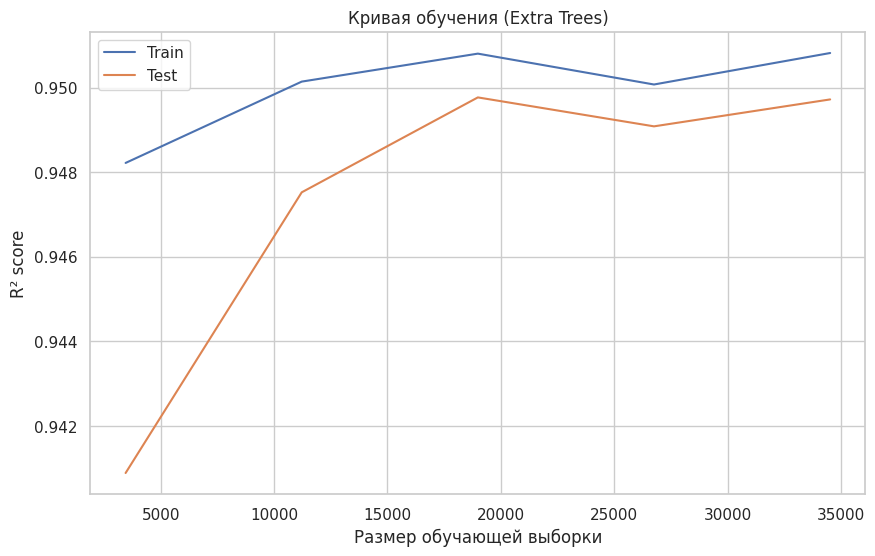

In [17]:
# Модель регрессии Extra Trees
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import learning_curve 
from xgboost import XGBRegressor

# Создание и обучение модели
et_model = ExtraTreesRegressor(
    n_estimators=150,  # Больше деревьев
    max_depth=7,      # Глубже деревья
    min_samples_split=15,  # Увеличить минимальное число samples для разделения
    min_samples_leaf=10,    # Контролировать переобучение в листьях
    max_features=0.7,       # Использовать только 70% признаков для каждого дерева
    random_state=42,
    n_jobs=-1              # Использовать все ядра процессора
)

et_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = et_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений (первые 50 наблюдений)
plt.figure(figsize=(10, 6))
plt.scatter(range(50), y_test[:50], color='blue', label='Фактические значения')
plt.scatter(range(50), y_pred[:50], color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения (первые 50 наблюдений)')
plt.legend()
plt.show()

# Кривая обучения для Extra Trees
train_sizes, train_scores, test_scores = learning_curve(
    et_model, 
    X_train, 
    y_train, 
    cv=5, 
    scoring='r2'
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test")
plt.xlabel("Размер обучающей выборки")
plt.ylabel("R² score")
plt.legend()
plt.title("Кривая обучения (Extra Trees)")
plt.grid(True)
plt.show()





*****************
Метрики качества:
*****************
MAE: 805.2744
MSE: 1499636.6903
RMSE: 1224.5965
MAPE: 0.4457
R²: 0.9057


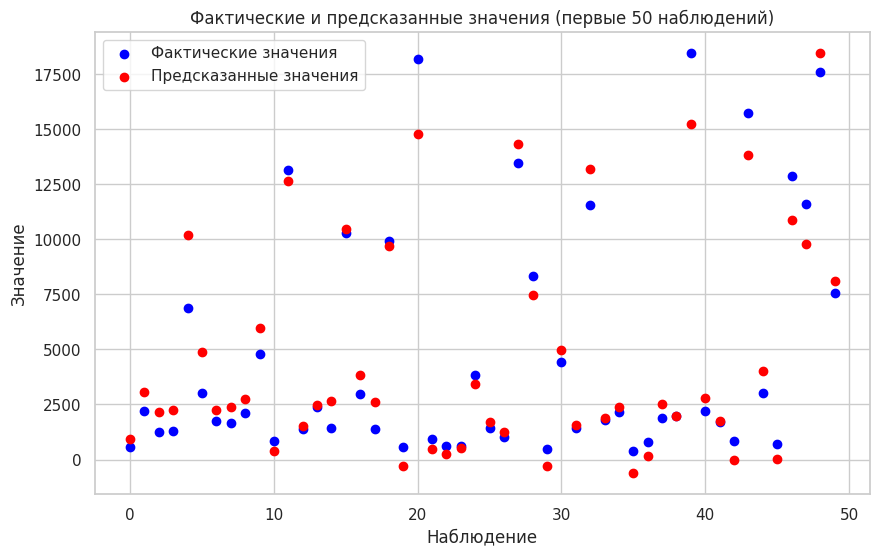

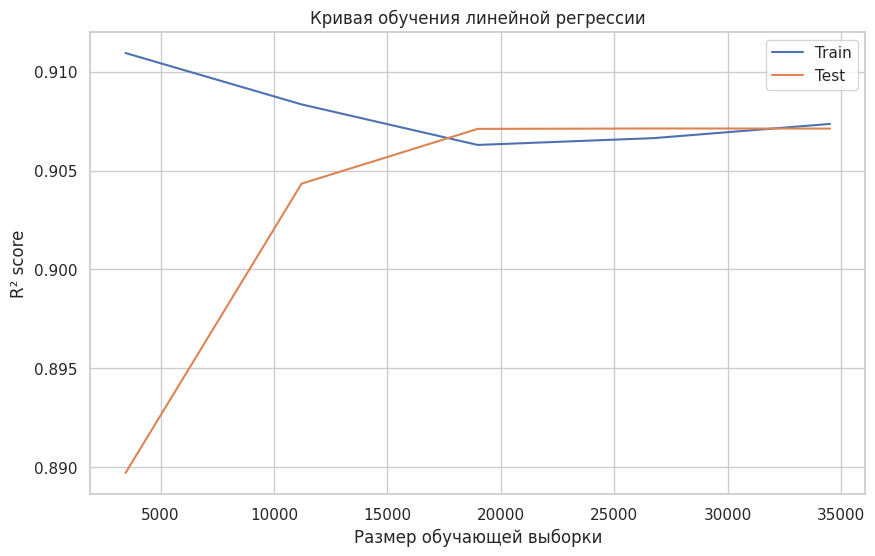

In [18]:
# Модель линейной регрессии
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Создание и обучение модели
model = LinearRegression(
    fit_intercept=True,  # учитываем intercept (смещение)
    copy_X=True,        # копируем данные (безопасно)
    n_jobs=-1,          # используем все ядра CPU
    positive=False
)
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений (первые 50 наблюдений)
plt.figure(figsize=(10, 6))
plt.scatter(range(50), y_test[:50], color='blue', label='Фактические значения')
plt.scatter(range(50), y_pred[:50], color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения (первые 50 наблюдений)')
plt.legend()
plt.show()

# Кривая обучения для Extra Trees
train_sizes, train_scores, test_scores = learning_curve(
    model, 
    X_train, 
    y_train, 
    cv=5, 
    scoring='r2'
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test")
plt.xlabel("Размер обучающей выборки")
plt.ylabel("R² score")
plt.legend()
plt.title("Кривая обучения линейной регрессии")
plt.grid(True)
plt.show()


*****************
Метрики качества:
*****************
MAE: 359.0569
MSE: 409665.9688
RMSE: 640.0515
MAPE: 0.1216
R²: 0.9742


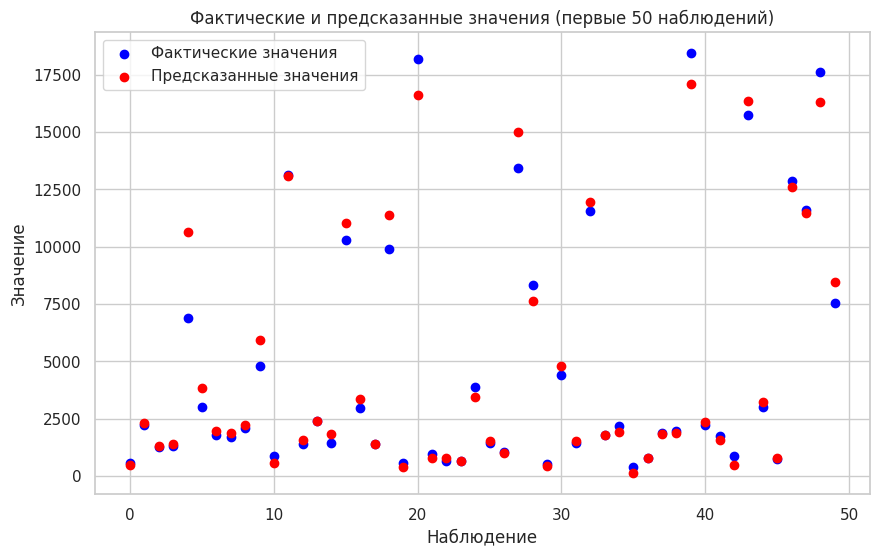

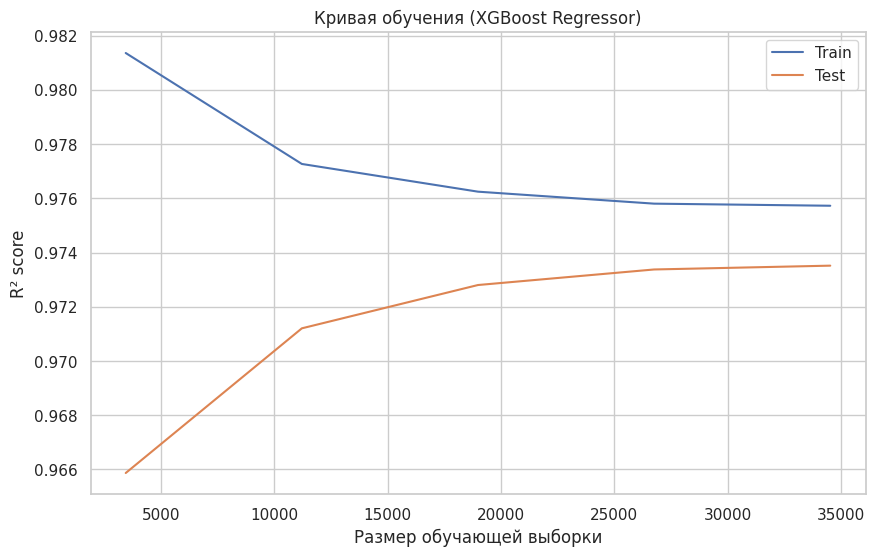

In [19]:
# XGBoost - Экстремальный градиентный бустинг.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder


# Определение модели
model = XGBRegressor(
     objective="reg:squarederror",
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=2,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42
)
# Обучение модели
model.fit(X_train, y_train)  # Обучаем модель на тренировочных данных

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'R²: {r2:.4f}')
import seaborn as sns
# Визуализация предсказанных и фактических значений (первые 50 наблюдений)
plt.figure(figsize=(10, 6))
plt.scatter(range(50), y_test[:50], color='blue', label='Фактические значения')
plt.scatter(range(50), y_pred[:50], color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения (первые 50 наблюдений)')
plt.legend()
plt.show()

# "Кривая обучения (XGBoost)"
train_sizes, train_scores, test_scores = learning_curve(
    model, 
    X_train, 
    y_train, 
    cv=5, 
    scoring='r2'
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test")
plt.xlabel("Размер обучающей выборки")
plt.ylabel("R² score")
plt.legend()
plt.title("Кривая обучения (XGBoost Regressor)")
plt.grid(True)
plt.show()
